# 机器学习纳米学位
## 毕业项目: 语音性别识别

欢迎来到机器学习工程师纳米学位的毕业项目！在这个notebook文件中，仅包括代码完成部分，个文件说明请参考`README`文档，具体分析请查看毕业项目报告，这里就不再赘述！

代码有大部分来自Udacity

### 1. 原始数据集导入

In [1]:
import datetime
#记录代码执行开始时间
begin = datetime.datetime.now()

In [2]:
# 代码来自udacity
# 检查Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    


In [3]:
# 代码来自udacity
# 引入这个项目需要的库
import numpy as np
import pandas as pd
# 不显示省略号
pd.set_option('display.max_columns', 100)
import visuals as vs
import time
from __future__ import division
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

# 载入整个客户数据集
try:
    data = pd.read_csv("voice.csv")
    print "Wholesale voice dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale voice dataset has 3168 samples with 21 features each.


In [4]:
# 显示数据列表中的前几项数据
display(data.head())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### 2. 数据基本统计

In [5]:
# 显示数据集的一个描述
# 因为性别特征是类别属性，所以没有显示
display(data.describe())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
# 统计数据集中的男女数量和所占百分比
male_num = np.sum(data['label'] == 'male')
female_num = np.sum(data['label'] == 'female')

male_percent = male_num/3168.*100
female_percent = female_num/3168.*100

print "number of male: {}".format(male_num)
print "number of female: {}".format(female_num)
print "Percentage of male individulas: {:.2f}%".format(male_percent)
print "Percentage of female individulas: {:.2f}%".format(female_percent)

number of male: 1584
number of female: 1584
Percentage of male individulas: 50.00%
Percentage of female individulas: 50.00%


### 3. 数据可视化

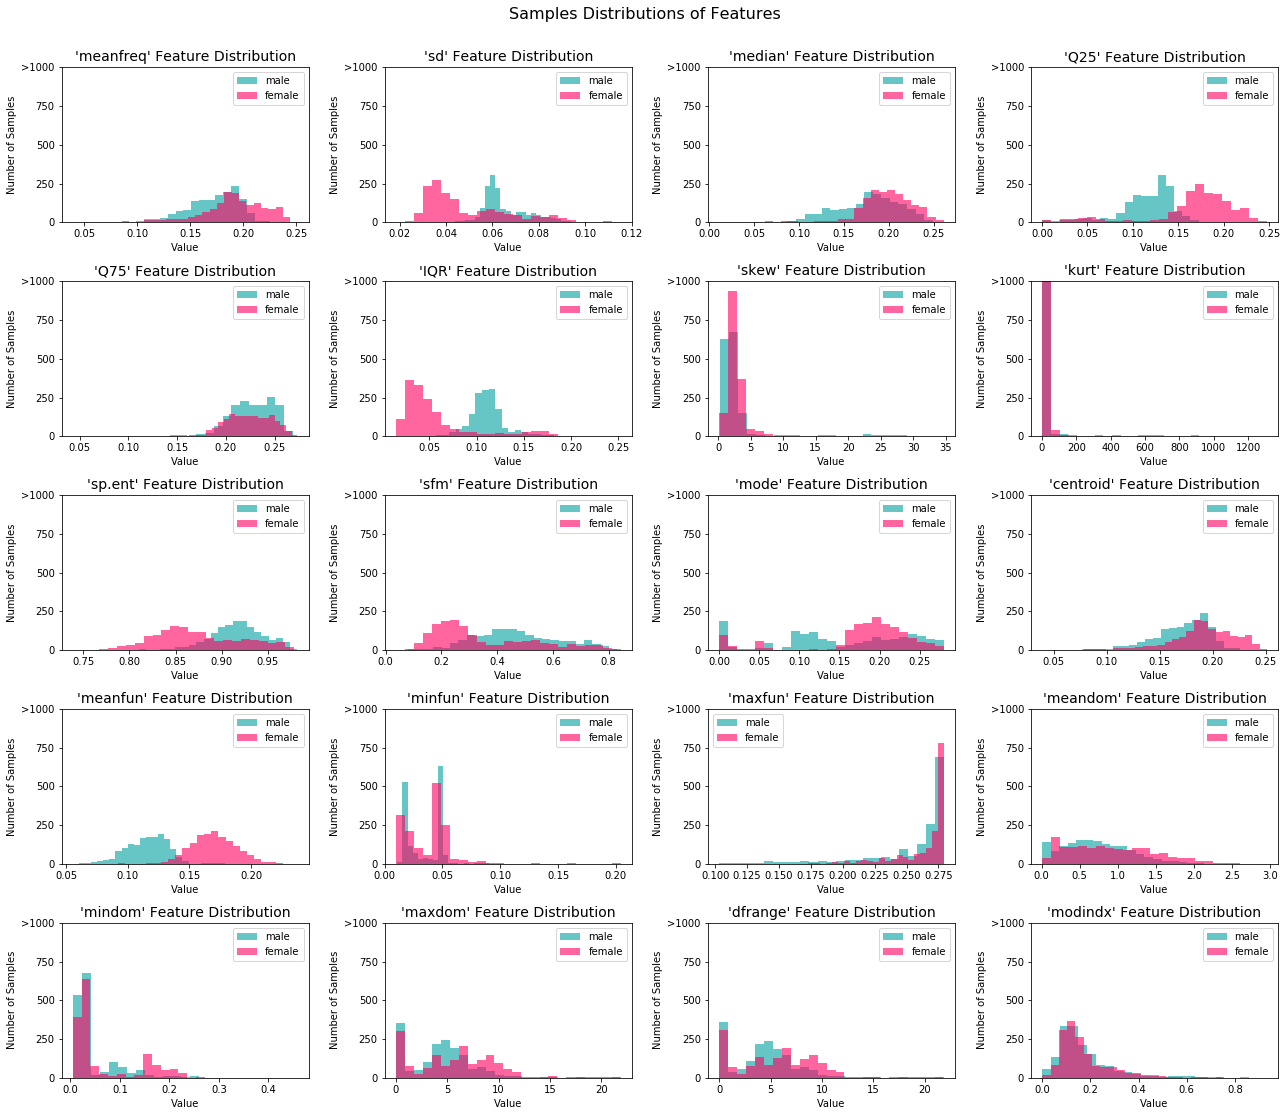

In [7]:
vs.distribution_sexID(data)

### 4. 抽取几个分析样本

In [8]:
# 代码来自 udacity
# 从数据集中选择三个希望抽样的数据点的索引
indices = [100, 2000, 3000]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.119977,0.081471,0.109892,0.060215,0.192688,0.132473,22.400866,560.122789,0.854878,0.505371,0.000000,0.119977,0.081201,0.015795,0.262295,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.188126,0.082495,0.218128,0.165719,0.247730,0.082010,2.384851,11.942546,0.933937,0.592861,0.000000,0.188126,0.181134,0.016649,0.266667,0.297917,0.007812,0.687500,0.679688,0.287356,female
2,0.172260,0.061118,0.167037,0.143519,0.215185,0.071667,2.226554,8.718907,0.934892,0.568876,0.058704,0.172260,0.151881,0.069444,0.277778,0.930176,0.029297,1.459961,1.430664,0.477816,female


### 5. 基准模型的准确率

In [9]:
# 将meanfun>0.2，直接判断为female;将meanfun<0.2直接判断为male；
male_num = 0
female_num = 0
tototal_num = 3168
for index, row in data.iterrows():
    if (row['meanfun']<0.2 and row['label'] == 'male'):
        male_num += 1
    else:
        male_num += 0
    if (row['meanfun']>0.2 and row['label'] == 'female'):
        female_num += 1
    else:
        female_num += 0
accuracy_base = (male_num+female_num) / tototal_num
print "base accuracy: {:.2f}".format(accuracy_base)

base accuracy: 0.53


## 数据预处理

### 6. 删除重复元素和meanfreq特征

In [10]:
# 删除重复元素
data_raw = data.drop_duplicates(keep='first')
# 删除meanfreq特征
data_raw = data_raw.drop('meanfreq', axis = 1)
print "data_raw has {} samples with {} features.".format(*data_raw.shape)

data_raw has 3166 samples with 20 features.


### 7. 对skew/kurt做对数处理

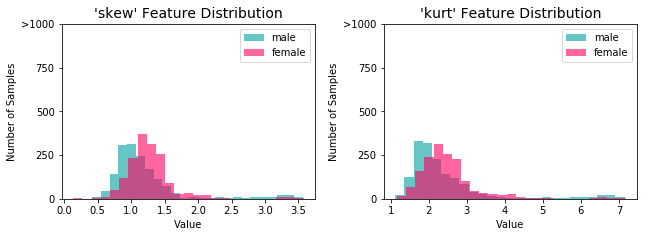

In [11]:
skewed = ['kurt', 'skew']
data_raw[skewed] = data_raw[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'kurt' 的特征
vs.distribution_sexID(data_raw, transformed = True)

### 8. 异常样本判断

In [12]:
repeat_index = []
samples_num = len(data_raw)
for feature in data_raw.keys():
    if feature != 'label':
        # 计算给定特征的Q1（数据的25th分位点）
        Q1 = np.percentile(data_raw[feature], 25)
        # 计算给定特征的Q3（数据的75th分位点）
        Q3 = np.percentile(data_raw[feature], 75)
        # 使用四分位范围计算异常阶（1.5倍的四分位距）
        step = (Q3 - Q1)*1.5

        abnormal_samples_index = data_raw[~((data_raw[feature] >= Q1 - step) & (data_raw[feature] <= Q3 + step))].index.tolist()
        repeat_index.extend(abnormal_samples_index)
    
# 输出 特征中有5个样本异常的索引
repeat_index_n = []
repeat_index_set = set(repeat_index)

for ind in repeat_index_set:
    if repeat_index.count(ind) > 3:
        repeat_index_n.append(ind)
        
print repeat_index_n
# 异常数据占比
print len(repeat_index_n)/ samples_num


[0, 1, 2, 94, 95, 96, 97, 99, 101, 102, 119, 147, 150, 290, 291, 292, 293, 294, 295, 296, 297, 453, 454, 541, 2884, 3019, 3059, 3065, 3071, 3072, 3075, 3077, 3079, 3080, 3082, 3083, 3090, 3112, 3145, 1501, 1503, 1683, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 2026, 2029]
0.0173720783323


### 9. 异常样本删除

In [13]:
# 移除异常的样本
good_data = data_raw.drop(data_raw.index[repeat_index_n]).reset_index(drop = True)
print "Wholesale voice dataset has {} samples with {} features each.".format(*good_data.shape)

Wholesale voice dataset has 3111 samples with 20 features each.


### 10. 性别编码

In [14]:
# 将数据的特征分割出来
features_dataframe = good_data.drop('label', axis = 1)
# 将'label'编码成数字值
sex_id = np.where(good_data['label'] == 'male', 0, 1)

### 11. 归一化数据

In [15]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
features_dataframe[numerical] = scaler.fit_transform(features_dataframe[numerical])

# 显示一个经过缩放的样例记录

display(features_dataframe.head())

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.651658,0.543528,0.389880,0.550758,0.484483,0.194789,0.086363,0.920299,0.856457,0.299565,0.433854,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
1,0.736960,0.396012,0.317597,0.537659,0.564305,0.177139,0.091277,0.957143,0.926348,0.372362,0.342566,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380
2,0.741941,0.371394,0.274045,0.561979,0.635909,0.273959,0.183223,0.919697,0.870197,0.401984,0.329338,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238
3,0.680183,0.552794,0.374976,0.535418,0.491717,0.231151,0.135866,0.938440,0.900382,0.307846,0.431215,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985
4,0.708114,0.483051,0.446335,0.715376,0.534805,0.215413,0.104161,0.902937,0.847309,0.458300,0.486483,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531


### 12. 定义train_predict预测函数

In [16]:
# 从sklearn中导入评价指标accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    #使用sample_size大小的训练数据来拟合学习器
    if sample_size < X_train.shape[0]:
        X1_train, X1_val, y1_train, y1_val = train_test_split(X_train, y_train, train_size=sample_size, random_state=0, stratify = y_train)
    else:
        X1_train = X_train
        y1_train = y_train
    start = time.time() # 获得程序开始时间
    learner = learner.fit(X1_train, y1_train)
    end = time.time() # 获得程序结束时间
    
    # 计算训练时间
    results['train_time'] = end - start
    
    # 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time.time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[0:300])
    end = time.time() # 获得程序结束时间
    
    # 计算预测用时
    results['pred_time'] = end - start
            
    # 计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[0:300], predictions_train)
        
    # 计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # 成功
#     print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

## 13. 特征选择

RandomForestClassifier
Optimal number of features : 9
Ranking of features :


,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,2,1,8,1,3,7,1,1,1,1,1,6,10,4,9,1,11,5


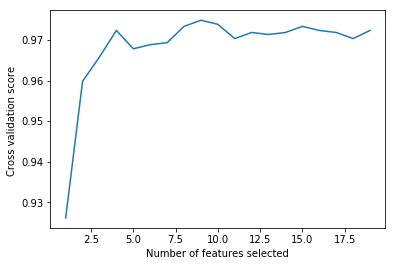

XGBClassifier
Optimal number of features : 12
Ranking of features :


,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,1,1,1,1,5,7,2,1,1,4,1,1,8,1,6,1,3,1


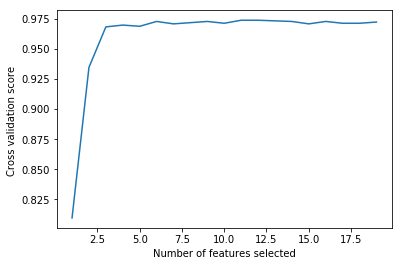

SVC
Optimal number of features : 5
Ranking of features :


,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,4,10,6,2,1,3,7,1,1,14,9,1,1,15,13,11,8,12,5


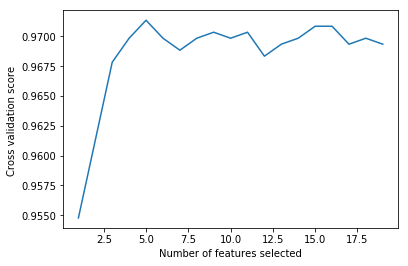

LogisticRegression
Optimal number of features : 10
Ranking of features :


,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,6,1,1,1,4,1,1,1,2,1,1,1,9,10,5,7,8,3


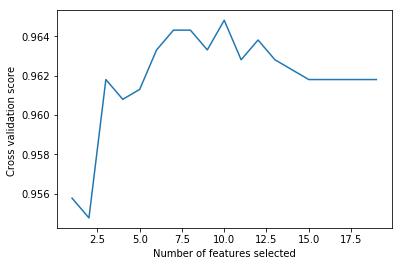

In [17]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
# 从sklearn中导入四个监督学习模型
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# 初始化四个模型
clf_A = RandomForestClassifier(random_state=0)
clf_B = XGBClassifier()
clf_C = SVC(kernel="linear", random_state=0)
clf_D = LogisticRegression(random_state=0)

# 拆分数据集
features_array = np.array(features_dataframe)
X_train, X_test, y_train, y_test = train_test_split(features_array, sex_id, test_size = 0.2, random_state = 0,
                                                        stratify = sex_id)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                        stratify = y_train)

# 创建RFE对象、计算交叉验证分数
for clf in [clf_A, clf_B, clf_C, clf_D]:
    # "accuracy"为正确率
    # 分类
    rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy')
    rfecv.fit(X_train, y_train)
    print "{}".format(clf.__class__.__name__) 
    print("Optimal number of features : %d" % rfecv.n_features_)
    print("Ranking of features :")
    display(pd.DataFrame(data=rfecv.ranking_.reshape(1, -1), index=[0], columns=numerical))

    # 绘制交叉验证得分和特征个数的关系
    
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score ")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

### 14. 删除特征后拆分数据集

In [18]:
features_RF_list = ['median', 'Q75', 'skew', 'kurt', 'minfun', 'maxfun', 'meandom', 'mindom', 'dfrange', 'modindx']
features_XG_list = ['skew', 'kurt', 'sp.ent', 'centroid', 'maxfun', 'mindom','dfrange']
features_SVC_list = ['sd', 'median', 'Q25', 'Q75', 'skew', 'kurt', 'mode', 'centroid', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
features_LR_list = ['median', 'skew', 'mode', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

# 针对不同的算法提供有不同特征的数据集
features_RF = features_dataframe.drop(features_RF_list, axis = 1)
features_XG = features_dataframe.drop(features_XG_list, axis = 1)
features_SVC = features_dataframe.drop(features_SVC_list, axis = 1)
features_LR = features_dataframe.drop(features_LR_list, axis = 1)

# 将dataframe转化为arrary
features_array_RF = np.array(features_RF)
features_array_XG = np.array(features_XG)
features_array_SVC = np.array(features_SVC)
features_array_LR = np.array(features_LR)

print "features_RF has {} samples with {} features.".format(*features_RF.shape)
print "features_XG has {} samples with {} features.".format(*features_XG.shape)
print "features_SVC has {} samples with {} features.".format(*features_SVC.shape)
print "features_LR has {} samples with {} features.".format(*features_LR.shape)

features_RF has 3111 samples with 9 features.
features_XG has 3111 samples with 12 features.
features_SVC has 3111 samples with 5 features.
features_LR has 3111 samples with 10 features.


In [19]:
# 确定不同学习器对应的array，因为特征个数不同
def array_condition(learner):
    if learner.__class__.__name__ == 'RandomForestClassifier':
        f_array = features_array_RF
    elif learner.__class__.__name__ == 'XGBClassifier':
        f_array = features_array_XG
    elif learner.__class__.__name__ == 'SVC':
        f_array = features_array_SVC
    elif learner.__class__.__name__ == 'LogisticRegression':
        f_array = features_array_LR
    return f_array

In [20]:
def train_predict_sub(learner, sample_size): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
    '''
    f_array = array_condition(learner)
    # 按照学习器的名称，将对应数据集拆分为训练集、验证集和测试集
    X_train, X_test, y_train, y_test = train_test_split(f_array, sex_id, test_size = 0.2, random_state = 0,
                                                        stratify = sex_id)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                        stratify = y_train)
    return train_predict(clf, sample_size, X_train, y_train, X_val, y_val)

### 15. 删除特征后进行训练

RandomForestClassifier


,0,1,2
acc_train,0.936667,0.973333,1.000000
acc_val,0.963855,0.967871,0.975904
pred_time,0.002518,0.002669,0.002714
train_time,0.037237,0.061226,0.069620


XGBClassifier


,0,1,2
acc_train,0.926667,0.970000,1.00000
acc_val,0.951807,0.971888,0.97992
pred_time,0.000789,0.001203,0.00264
train_time,0.006672,0.018735,0.28515


SVC


,0,1,2
acc_train,0.843333,0.976667,0.970000
acc_val,0.823293,0.965863,0.973896
pred_time,0.000729,0.001081,0.002534
train_time,0.000353,0.000734,0.012602


LogisticRegression


,0,1,2
acc_train,0.906667,0.953333,0.973333
acc_val,0.891566,0.959839,0.969880
pred_time,0.000148,0.000157,0.000255
train_time,0.000382,0.000646,0.004088


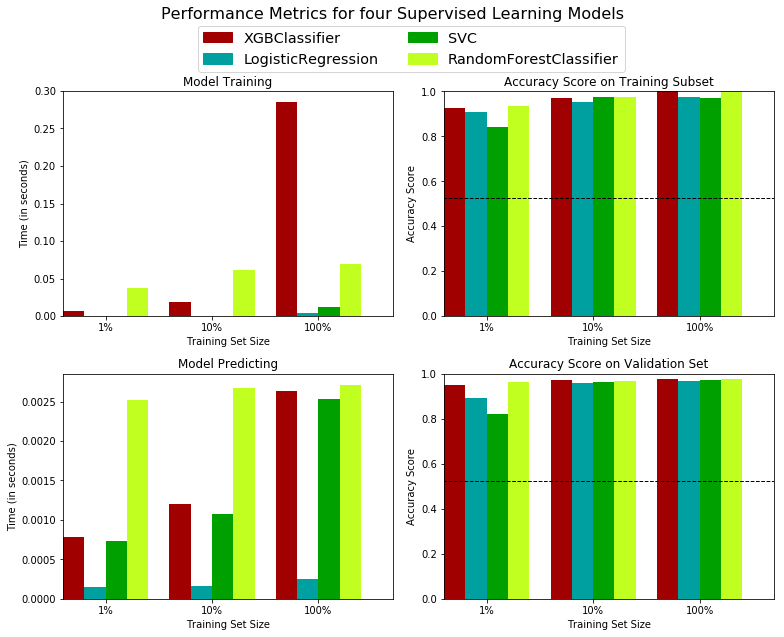

In [21]:
# 从sklearn中导入四个监督学习模型
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 初始化四个模型
clf_A = RandomForestClassifier(random_state=0)
clf_B = XGBClassifier()
clf_C = SVC(kernel="linear", random_state=0)
clf_D = LogisticRegression(random_state=0)

# 计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(X_train.shape[0] * 0.01)
samples_10 = int(X_train.shape[0] * 0.1)
samples_100 = int(X_train.shape[0] * 1)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_sub(clf, samples)
    print "{}".format(clf_name)   
    display(pd.DataFrame(results[clf_name]))

# 基准模型准确率
accuracy = accuracy_base
# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy)

## 16. 对随机森林和XGBoost模型进行网格寻优

In [22]:
# 代码来自Udacity
# 导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
#clf_B = XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=7)
for clf in [clf_A, clf_B]:
    # 按照不同的学习器类型拆分数据集
    fe_array = array_condition(clf)
    X_train, X_test, y_train, y_test = train_test_split(fe_array, sex_id, test_size = 0.2, random_state = 0,
                                                        stratify = sex_id)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                        stratify = y_train)

    # 创建你希望调节的参数列表
    if clf.__class__.__name__ == 'RandomForestClassifier':
        parameters =  {'n_estimators' : range(4,14,2), 'min_samples_split' : range(2,7,1)}
    elif clf.__class__.__name__ == 'XGBClassifier':
        parameters = {'max_depth':range(2, 7), 'n_estimators':range(100, 1100, 200), 'learning_rate':[0.05, 0.1, 0.25, 0.5, 1.0]}

   
    # 在分类器上使用网格搜索，使用'scorer'作为评价函数
    grid_obj = GridSearchCV(clf, parameters)

    # 用训练数据拟合网格搜索对象并找到最佳参数
    grid_obj.fit(X_train, y_train)

    # 得到estimator
    best_clf = grid_obj.best_estimator_

    # 使用没有调优的模型做预测
    predictions = (clf.fit(X_train, y_train)).predict(X_val)
    best_predictions = best_clf.predict(X_val)

    # 汇报调参前和调参后的分数
    print "--------------------"
    print clf.__class__.__name__
    print "Unoptimized model"
    
    print "Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions))
    print "\nOptimized Model"
    print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions))
    print "Parameter setting that gave the best results on the hold out data:"
    display(pd.DataFrame(data=grid_obj.best_params_, index=[0]))

--------------------
RandomForestClassifier
Unoptimized model
Accuracy score on validation data: 0.9759

Optimized Model
Final accuracy score on the validation data: 0.9799
Parameter setting that gave the best results on the hold out data:


,min_samples_split,n_estimators
0,5,12


--------------------
XGBClassifier
Unoptimized model
Accuracy score on validation data: 0.9799

Optimized Model
Final accuracy score on the validation data: 0.9880
Parameter setting that gave the best results on the hold out data:


,learning_rate,max_depth,n_estimators
0,1.0,2,300


## 17. 最终学习器在测试集上的准确率

In [23]:
# 还是沿用之前的train_predict，只不过是将train_predict的输入由验证集换成了测试集
def train_predict_test(learner, sample_size): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
    '''
    f_array = array_condition(learner)
    # 按照学习器的名称，将对应数据集拆分为训练集、验证集和测试集
    X_train, X_test, y_train, y_test = train_test_split(f_array, sex_id, test_size = 0.2, random_state = 0,
                                                        stratify = sex_id)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                        stratify = y_train)
    return train_predict(clf, samples, X_train, y_train, X_test, y_test)

RandomForestClassifier


,0,1,2
acc_train,0.926667,0.963333,0.993333
acc_val,0.945425,0.963082,0.982343
pred_time,0.002947,0.003187,0.003400
train_time,0.044598,0.051411,0.083156


XGBClassifier


,0,1,2
acc_train,0.926667,0.970000,1.000000
acc_val,0.942215,0.966292,0.980738
pred_time,0.001489,0.001547,0.004978
train_time,0.012368,0.026137,0.309070


SVC


,0,1,2
acc_train,0.843333,0.976667,0.970000
acc_val,0.820225,0.966292,0.971108
pred_time,0.001850,0.001790,0.002935
train_time,0.001001,0.000816,0.011749


LogisticRegression


,0,1,2
acc_train,0.906667,0.953333,0.973333
acc_val,0.879615,0.948636,0.966292
pred_time,0.000171,0.000150,0.000160
train_time,0.000433,0.000580,0.003819


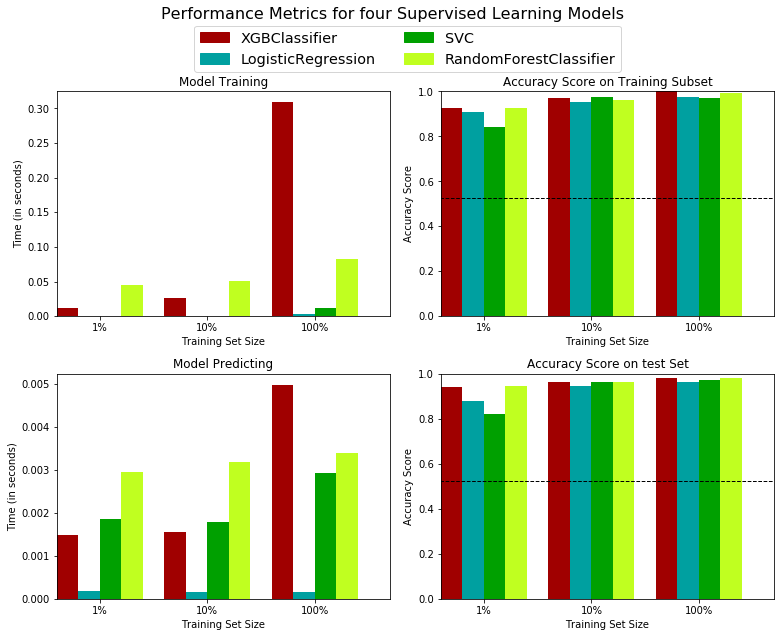

In [24]:
# 初始化四个模型
clf_A = RandomForestClassifier(min_samples_split=5, n_estimators=12, random_state=0)
clf_B = XGBClassifier(learning_rate=1.0, n_estimators=300, max_depth=2)
clf_C = SVC(kernel="linear", random_state=0)
clf_D = LogisticRegression(random_state=0)

# 计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(X_train.shape[0] * 0.01)
samples_10 = int(X_train.shape[0] * 0.1)
samples_100 = int(X_train.shape[0] * 1)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_test(clf, samples)
    print "{}".format(clf_name)   
    display(pd.DataFrame(results[clf_name]))
            
accuracy = accuracy_base
# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate_test(results, accuracy)

In [25]:
#记录代码执行结束时间
end = datetime.datetime.now()
total_time =  end - begin

print "代码总共花费时间: "
print "--------------"
print total_time

代码总共花费时间: 
--------------
0:03:19.679711
